In [1]:
exec(open("inc_notebook.py").read())

current working dirF:\myProjects\tfKeras\UCSC\Opensource\DoodleForPicStory


In [2]:
import logging, sys, math,os
exec(open("classifiers/initKeras.py").read())

Using TensorFlow backend.


In [3]:
from datetime import datetime
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib qt
import seaborn as sns
sns.set(style="darkgrid")

if sys.modules.get( 'library.LivePlotKeras', False ) != False :
    del sys.modules['library.LivePlotKeras'] 
if sys.modules.get( 'LivePlotKeras', False ) != False :
    del sys.modules['LivePlotKeras'] 
from library.LivePlotKeras import *

logging.warning( "LivePlotKeras loaded" )

livePlotKeras = LivePlotKeras()

In [4]:
if sys.modules.get( 'dataProcessors.DoodleDataStats', False ) != False :
    del sys.modules['dataProcessors.DoodleDataStats'] 
if sys.modules.get( 'DoodleDataStats', False ) != False :
    del sys.modules['DoodleDataStats'] 
    
from dataProcessors.DoodleDataStats import DoodleDataStats
dataStats = DoodleDataStats("folder")
dataStats.loadFromPersistentCacheByDate(datetime(2019, 11, 21))

{'folder': 'data/quickdraw-raw',
 'countClasses': 4,
 'countItems': 508536,
 'classes': {'alarm_clock': 123399,
  'baseball_bat': 123809,
  'bicycle': 126527,
  'The_Eiffel_Tower': 134801},
 'maxPerClass': 134801}

In [5]:
if sys.modules.get( 'dataProcessors.DoodleDataGeneratorByClass', False ) != False :
    del sys.modules['dataProcessors.DoodleDataGeneratorByClass'] 
if sys.modules.get( 'DoodleDataGeneratorByClass', False ) != False :
    del sys.modules['DoodleDataGeneratorByClass'] 
    
from dataProcessors.DoodleDataGeneratorByClass import DoodleDataGeneratorByClass

trainGenerator = DoodleDataGeneratorByClass(dataStats.stats,split=0.7, part='first', batch_size = 32, batchesPerEpoch = 100)
validationGenerator = DoodleDataGeneratorByClass(dataStats.stats,split=0.7, part='second', batch_size = 32, batchesPerEpoch = 30)

In [8]:
if sys.modules.get( 'classifiers.ClassifierFactory', False ) != False :
    del sys.modules['classifiers.ClassifierFactory'] 
if sys.modules.get( 'ClassifierFactory', False ) != False :
    del sys.modules['ClassifierFactory'] 
    
from classifiers.ClassifierFactory import ClassifierFactory
classifierFactory = ClassifierFactory()

model = classifierFactory.create(
    template = 'UpSampling',
    outputClasses = dataStats.stats['countClasses'],
    inputShape = (28, 28, 1)
)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 64)        0         
__________

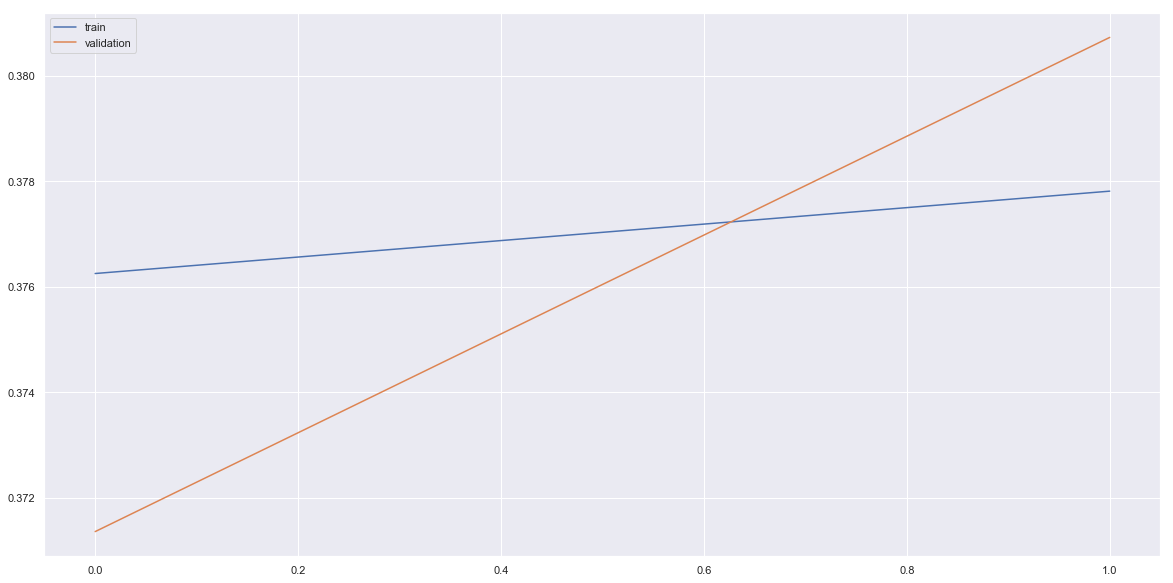

In [9]:
history = model.fit_generator( 
                    generator=trainGenerator,
                    validation_data=validationGenerator,
                    use_multiprocessing=False, 
                    workers=3, 
                    initial_epoch = 1,
                    epochs=3,
                    max_q_size = 50,
                    steps_per_epoch = trainGenerator.n_batches,
                    validation_steps = validationGenerator.n_batches,
                    callbacks = [livePlotKeras]
                   )